In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
data=pd.read_excel("C:\\Users\\SHERLOCK HOLMES\\Documents\\transactions.xlsx")
data["Promotion"]=data["Promotion"].fillna("No Promotion")
data["Date"]=pd.to_datetime(data["Date"])
df=pd.DataFrame(data)

In [4]:
df.head()

Transaction_ID                Date       Customer_Name  Total_Items  \
0      1000667075 2022-09-12 17:40:23          David King            5   
1      1000156022 2022-01-20 23:03:20  Michael Williamson            3   
2      1000681674 2022-10-15 07:49:59       Chelsea Garza            7   
3      1000692089 2024-04-05 09:39:58         Scott Lopez            5   
4      1000328702 2021-05-28 04:16:54       Crystal Adams            4   

   Amount($)  Payment_Method     City         Store_Type  Discount_Applied  \
0      30.98      Debit Card  Chicago     Warehouse Club              True   
1      23.29     Credit Card   Boston     Warehouse Club              True   
2      25.62      Debit Card  Chicago           Pharmacy             False   
3      14.64  Mobile Payment  Atlanta           Pharmacy             False   
4      62.27     Credit Card    Miami  Convenience Store             False   

  Customer_Category  Season                   Promotion  
0          Teenager    Fall      BOGO (Buy One Get One)  
1         Homemaker  Winter  Discount on Selected Items  
2          Teenager    Fall  Discount on Selected Items  
3         Homemaker  Summer  Discount on Selected Items  
4           Retiree  Summer                No Promotion

In [5]:
avg_trans = data.groupby(["Store_Type", "Season"])["Amount($)"].mean().reset_index()

C:\Users\SHERLOCK HOLMES\AppData\Local\Temp\ipykernel_9572\1768258206.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_transaction,x='Store_Type',y='Amount($)',palette='viridis')


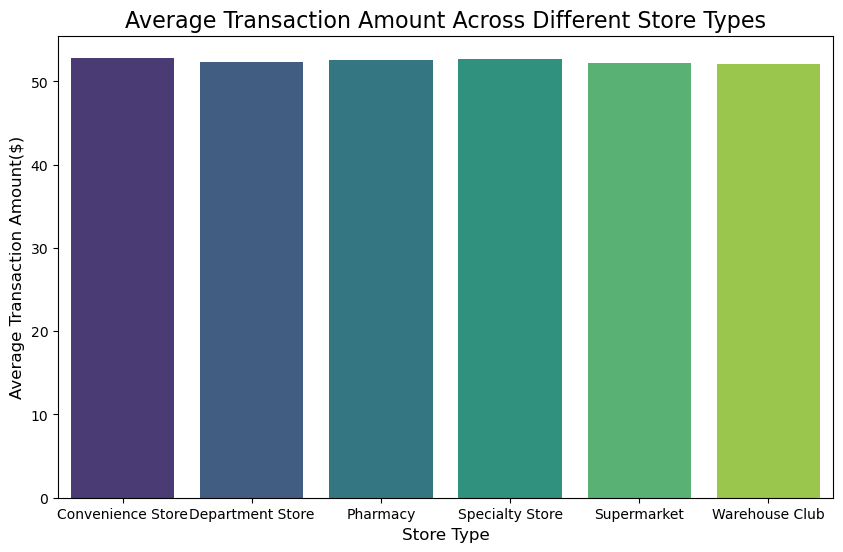

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
average_transaction=df.groupby('Store_Type')['Amount($)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=average_transaction,x='Store_Type',y='Amount($)',palette='viridis')
plt.title('Average Transaction Amount Across Different Store Types',fontsize=16)
plt.xlabel('Store Type',fontsize=12)
plt.ylabel('Average Transaction Amount($)',fontsize=12)
plt.savefig("Question11.png")
plt.show()


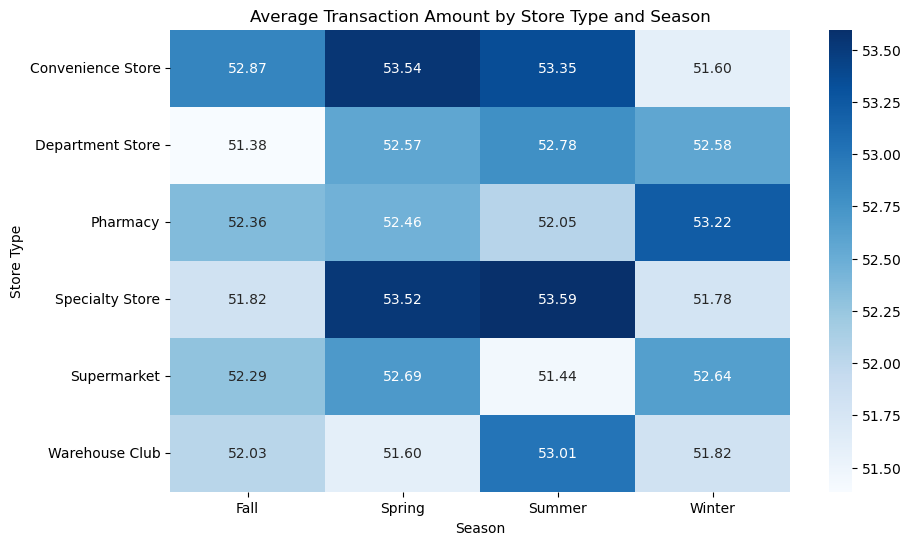

In [7]:
plt.figure(figsize=(10,6))
pivot_table =avg_trans.pivot(index="Store_Type",columns="Season",values="Amount($)")
sns.heatmap(pivot_table, annot=True,fmt=".2f",cmap="Blues")
plt.title("Average Transaction Amount by Store Type and Season")
plt.xlabel("Season")
plt.ylabel("Store Type")
plt.savefig("Question12.png")
plt.show()


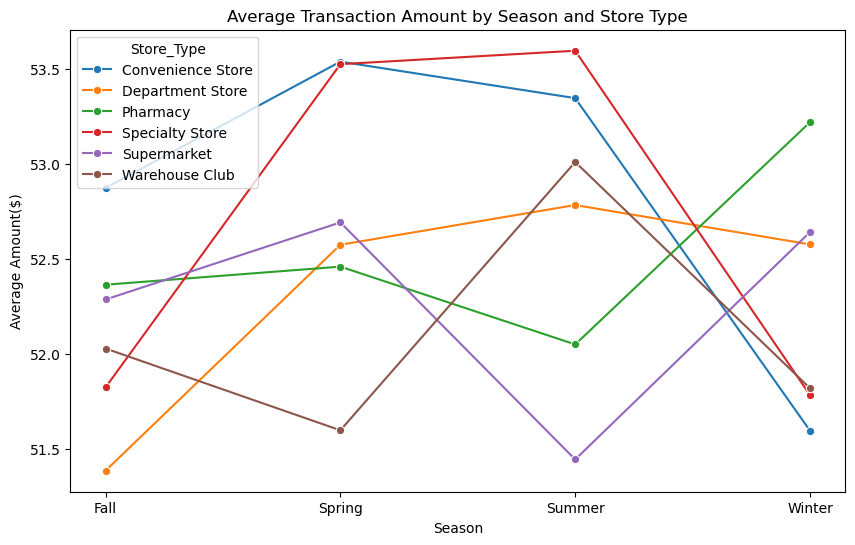

In [119]:
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_trans,x="Season",y="Amount($)",hue="Store_Type",marker="o")
plt.title("Average Transaction Amount by Season and Store Type")
plt.xlabel("Season")
plt.ylabel("Average Amount($)")
plt.savefig("Question13.png")
plt.show()


In [11]:
import plotly.express as px

fig =px.line_polar(avg_trans,r="Amount($)",theta="Season",color="Store_Type",line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(title="Average Transaction Amount by Store Type and Season")
fig.show()



In [15]:
avg_trans_items=df["Total_Items"].mean()
high_trans_data=df[df["Total_Items"]>avg_trans_items]
payment_method_count=high_trans_data.groupby("Payment_Method").size().reset_index(name="Count")
print(payment_method_count)



   Payment_Method  Count
0            Cash   4740
1     Credit Card   4872
2      Debit Card   4869
3  Mobile Payment   4736


In [17]:
most_common_payment_method=payment_method_count.sort_values(by="Count",ascending=False).iloc[0]
print(most_common_payment_method)

Payment_Method    Credit Card
Count                    4872
Name: 1, dtype: object


C:\Users\SHERLOCK HOLMES\AppData\Local\Temp\ipykernel_9572\3044152898.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_method_counts, x="Payment_Method", y="Count", palette="Set2")


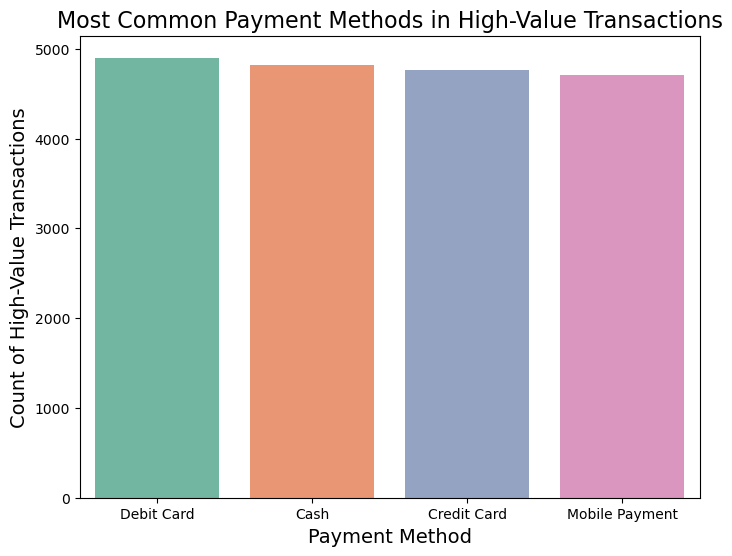

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

average_transaction_amount = df["Amount($)"].mean()
high_value_transactions = df[df["Amount($)"] > average_transaction_amount]
payment_method_counts =high_value_transactions["Payment_Method"].value_counts().reset_index()
payment_method_counts.columns =["Payment_Method", "Count"]
plt.figure(figsize=(8, 6))
sns.barplot(data=payment_method_counts, x="Payment_Method", y="Count", palette="Set2")
plt.title("Most Common Payment Methods in High-Value Transactions", fontsize=16)
plt.xlabel("Payment Method", fontsize=14)
plt.ylabel("Count of High-Value Transactions", fontsize=14)
plt.savefig("Question21.png")
plt.show()


             City  Payment_Method  Count
2         Atlanta      Debit Card    475
5          Boston     Credit Card    494
8         Chicago            Cash    504
14         Dallas      Debit Card    524
18        Houston      Debit Card    528
23    Los Angeles  Mobile Payment    504
25          Miami     Credit Card    503
29       New York     Credit Card    494
32  San Francisco            Cash    482
37        Seattle     Credit Card    492


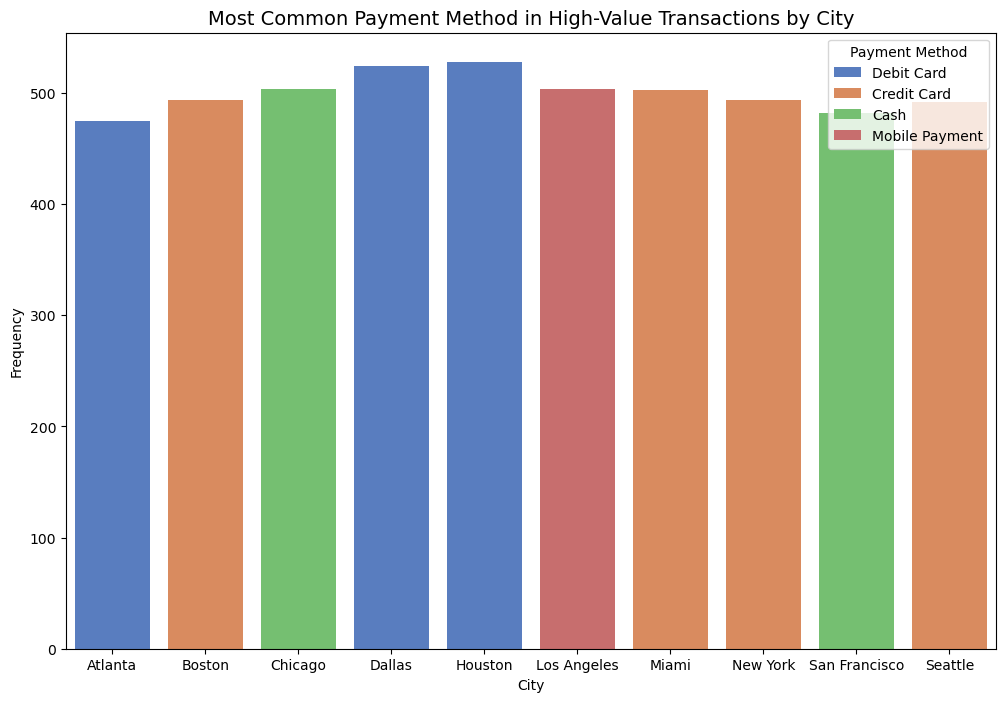

In [123]:
city_payment_method_counts = high_trans_data.groupby(["City", "Payment_Method"]).size().reset_index(name="Count")
most_common_by_city = city_payment_method_counts.loc[city_payment_method_counts.groupby("City")["Count"].idxmax()]
print(most_common_by_city)
plt.figure(figsize=(12, 8))
sns.barplot(data=most_common_by_city, x="City", y="Count",hue="Payment_Method", palette="muted")
plt.title("Most Common Payment Method in High-Value Transactions by City", fontsize=14)
plt.xlabel("City")
plt.ylabel("Frequency")
plt.legend(title="Payment Method")
plt.savefig("Question43.png")
plt.show()


C:\Users\SHERLOCK HOLMES\AppData\Local\Temp\ipykernel_9572\51202255.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_comparison, x='Discount_Applied', y='Total_Sales', palette='Blues_d')


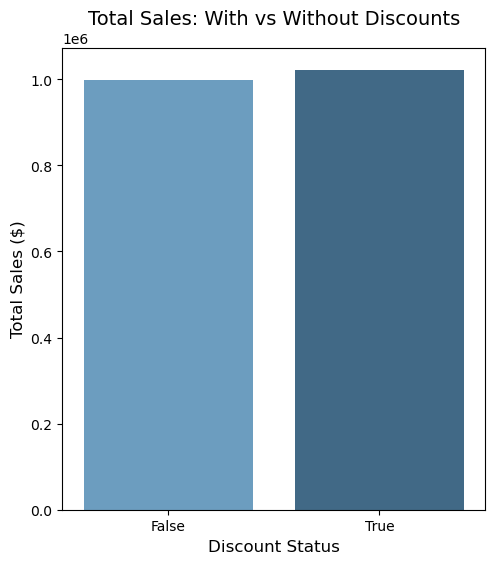

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sales_comparison =df.groupby('Discount_Applied')['Amount($)'].agg(['sum', 'mean']).reset_index()
sales_comparison.rename(columns={'sum': 'Total_Sales', 'mean': 'Average_Sales'}, inplace=True)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=sales_comparison, x='Discount_Applied', y='Total_Sales', palette='Blues_d')
plt.title('Total Sales: With vs Without Discounts', fontsize=14)
plt.xlabel('Discount Status',fontsize=12)
plt.ylabel('Total Sales ($)',fontsize=12)
plt.savefig("Question31.png")
plt.show()


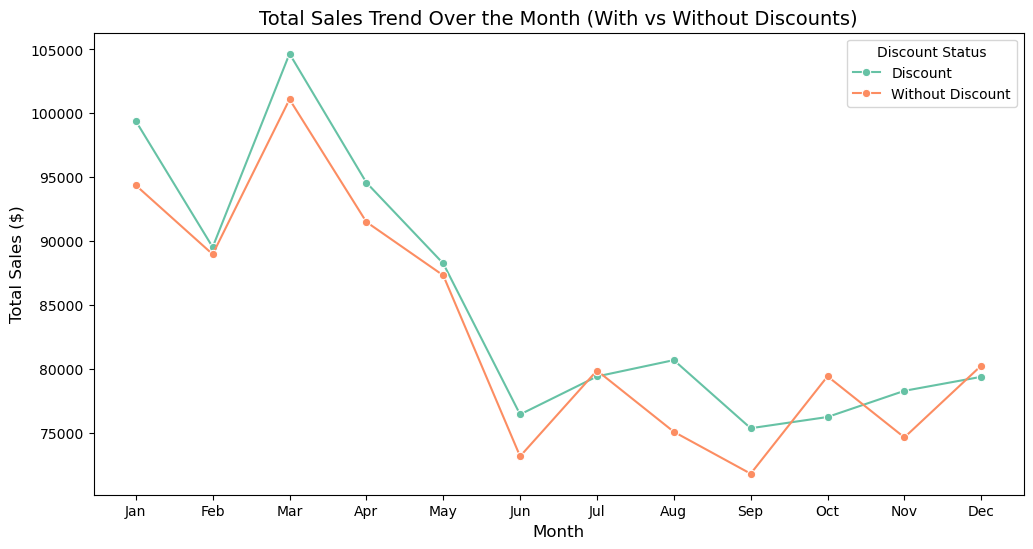

In [23]:
df_copy = df.copy()
df_copy["Discount_Applied"] = df_copy["Discount_Applied"].replace({True: "Discount", False: "Without Discount"})
df_copy["Month"] = df_copy["Date"].dt.month
sales_trend = df_copy.groupby(["Month", "Discount_Applied"])["Amount($)"].agg(["sum", "mean"]).reset_index().rename(columns={"sum": "Total_Sales", "mean": "Average_Sales"})

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trend, x="Month", y="Total_Sales", hue="Discount_Applied", marker="o", palette="Set2")
plt.title("Total Sales Trend Over the Month (With vs Without Discounts)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales ($)",fontsize=12)
plt.xticks(range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Discount Status")
plt.savefig("Question32.png")
plt.show()


Top 3 cities are: ['San Francisco', 'Seattle', 'Atlanta']


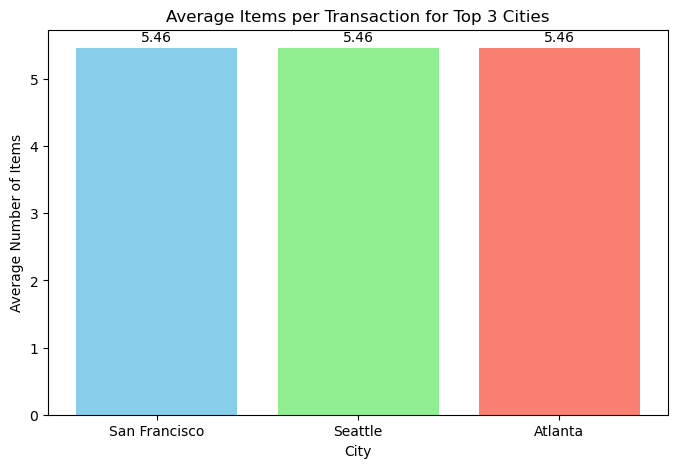

In [107]:
city_avg_trans_item=df.groupby("City")["Total_Items"].mean().reset_index()
city_avg_trans_item=city_avg_trans_item.sort_values(by="Total_Items",ascending=True)
top_cities=city_avg_trans_item.head(3)["City"].tolist()
print("Top 3 cities are:",top_cities)
top_3_cities=city_avg_trans_item.head(3)
cities=top_3_cities["City"]
avg_items=top_3_cities["Total_Items"]
plt.figure(figsize=(8, 5))
plt.bar(cities, avg_items, color=['skyblue', 'lightgreen', 'salmon'])
for index, value in enumerate(avg_items):
    plt.text(index, value + 0.1, f"{value:.2f}", ha='center',fontsize=10)
plt.title("Average Items per Transaction for Top 3 Cities")
plt.ylabel("Average Number of Items")
plt.xlabel("City")
plt.savefig("Question41.png")
plt.show()




City      Atlanta  San Francisco    Seattle
Season                                     
Fall    51.791907      52.562057  52.204168
Spring  53.004857      53.126451  51.664123
Summer  53.939137      52.975748  51.909205
Winter  51.734772      52.317479  52.706887


<Figure size 1200x800 with 0 Axes>

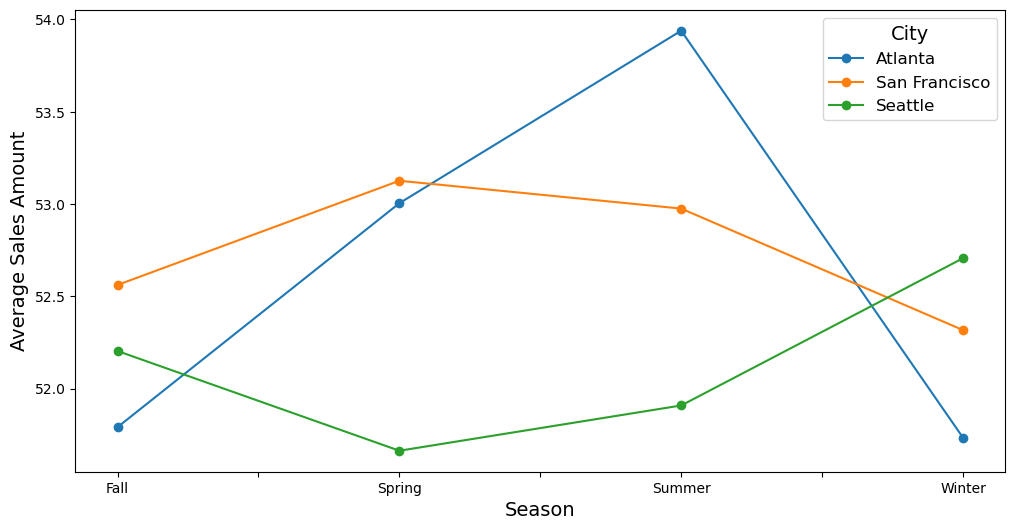

In [105]:
filtered_data=df[df["City"].isin(top_cities)]
seasonal_sales=filtered_data.groupby(["City","Season"])["Amount($)"].mean().reset_index()
pivot_data=seasonal_sales.pivot(index="Season",columns="City",values="Amount($)")
print(pivot_data)
plt.figure(figsize=(12,8))
pivot_data.plot(kind="line",marker="o",figsize=(12,6))
plt.xlabel("Season",fontsize=14)
plt.ylabel("Average Sales Amount",fontsize=14)
plt.legend(title="City", fontsize=12, title_fontsize=14)
plt.savefig("Question42.png")
plt.show()



C:\Users\SHERLOCK HOLMES\AppData\Local\Temp\ipykernel_9572\2820814815.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promotion_analysis,x='Promotion', y='Total_Sales', palette='Blues_d')


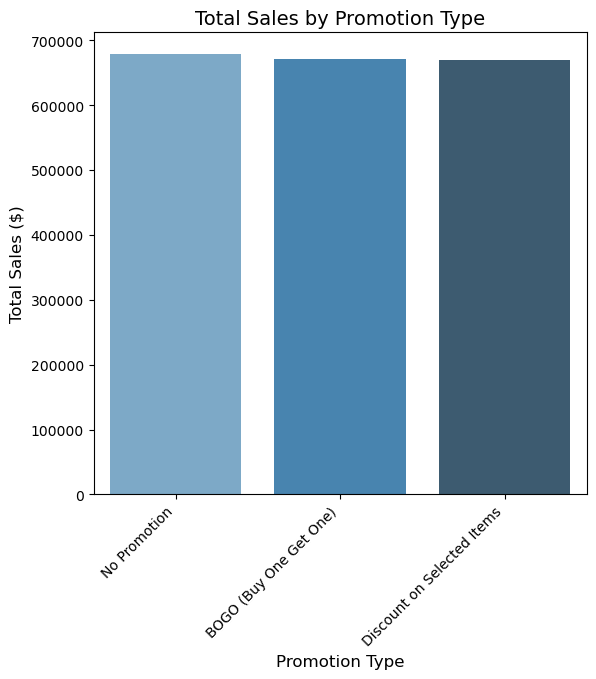

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
promotion_analysis =df.groupby('Promotion')['Amount($)'].agg(['sum','mean']).reset_index()
promotion_analysis.rename(columns={'sum': 'Total_Sales', 'mean': 'Average_Sales'}, inplace=True)
promotion_analysis =promotion_analysis.sort_values(by='Total_Sales', ascending=False)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=promotion_analysis,x='Promotion', y='Total_Sales', palette='Blues_d')
plt.title('Total Sales by Promotion Type', fontsize=14)
plt.xlabel('Promotion Type',fontsize=12)
plt.ylabel('Total Sales ($)',fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.savefig("Question51.png")
plt.show()


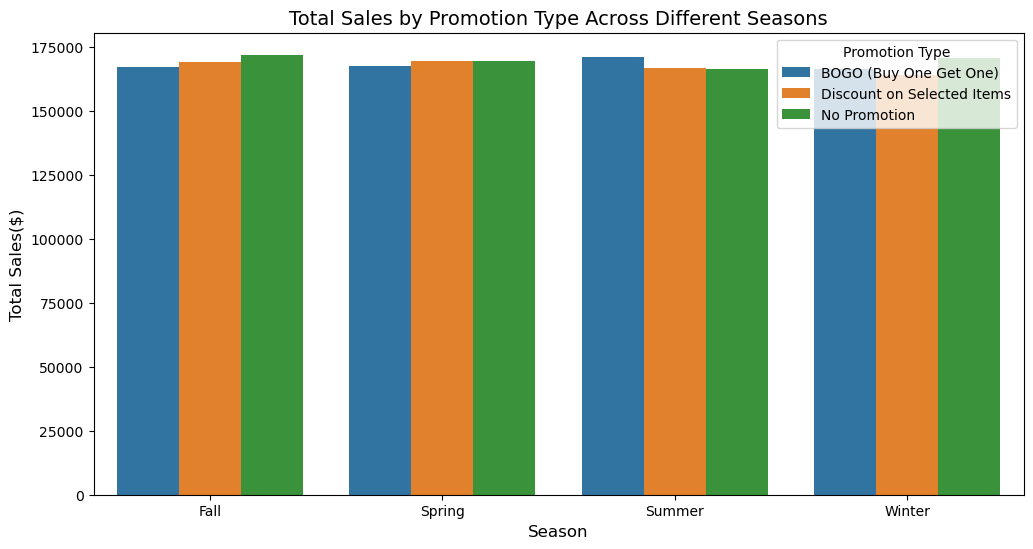

In [101]:

promotion_sales=df.groupby(["Season","Promotion"])["Amount($)"].agg(["sum", "mean"]).reset_index().rename(columns={"sum":"Total_Sales","mean": "Average_Sales"})

plt.figure(figsize=(12,6))
sns.barplot(data=promotion_sales,x="Season",y="Total_Sales",hue="Promotion")
plt.title("Total Sales by Promotion Type Across Different Seasons",fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Total Sales($)",fontsize=12)
plt.legend(title="Promotion Type")
plt.savefig("Question51.png")
plt.show()


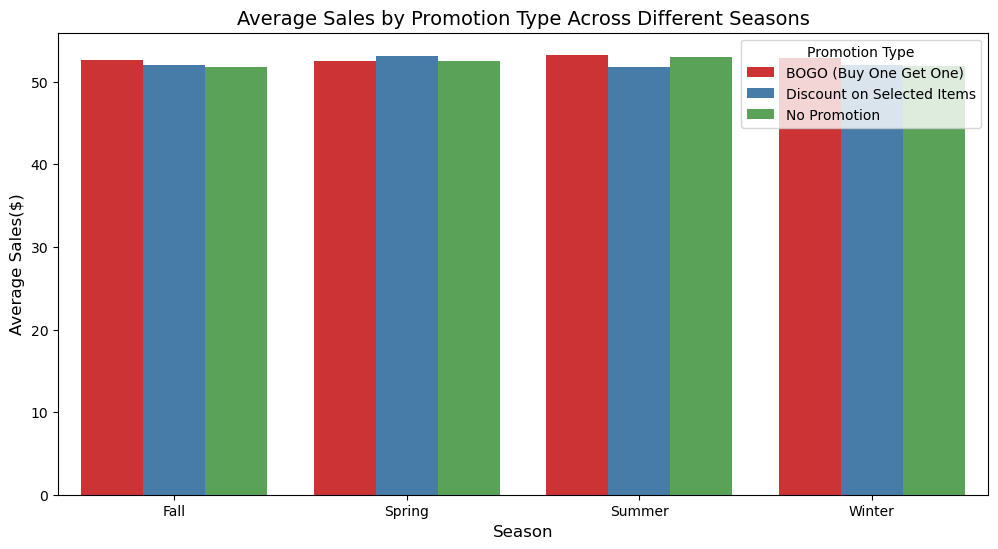

    Season                   Promotion  Total_Sales
2     Fall                No Promotion    171933.07
4   Spring  Discount on Selected Items    169475.57
6   Summer      BOGO (Buy One Get One)    170949.08
11  Winter                No Promotion    170667.83


In [99]:
plt.figure(figsize=(12,6))
sns.barplot(data=promotion_sales, x="Season",y="Average_Sales", hue="Promotion", palette="Set1")
plt.title("Average Sales by Promotion Type Across Different Seasons", fontsize=14)
plt.xlabel("Season",fontsize=12)
plt.ylabel("Average Sales($)",fontsize=12)
plt.legend(title="Promotion Type")
plt.savefig("Question52.png")
plt.show()
best_promotion_per_season =promotion_sales.loc[promotion_sales.groupby("Season")["Total_Sales"].idxmax()]
print(best_promotion_per_season[["Season", "Promotion", "Total_Sales"]])